In [15]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from tabulate import tabulate
from IPython.display import display, HTML
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense,RepeatVector,Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error


<h2>CNN-LUCAS</h2>
<h4>(CNN với số lớp Fully Connected layer là số Lucas)</h4>

In [16]:
import h5py
from keras.models import load_model


model_CNN_Lucas = load_model('Daily_CNN_82.h5')


with h5py.File('Daily_CNN_82_data.h5', 'r') as f:
   
    y_test_CNN_Lucas = f['y_test'][:]
    
   
    X_test_CNN_Lucas = f['X_test'][:]
    
   
    time_CNN_Lucas = f['training_time'][()]


In [17]:
model_CNN_Lucas.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 6, 128)            384       
                                                                 
 conv1d_1 (Conv1D)           (None, 5, 128)            32896     
                                                                 
 conv1d_2 (Conv1D)           (None, 4, 128)            32896     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 2, 128)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 100)               25700     
                                                        

In [18]:
y_pred_CNN_Lucas = model_CNN_Lucas.predict(X_test_CNN_Lucas)
y_pred_CNN_Lucas = np.reshape(y_pred_CNN_Lucas, (-1, 1))
mse_CNN_Lucas = mean_squared_error(y_test_CNN_Lucas, y_pred_CNN_Lucas)
rmse_CNN_Lucas = np.sqrt(mse_CNN_Lucas)
mape_CNN_Lucas = mean_absolute_percentage_error(y_test_CNN_Lucas, y_pred_CNN_Lucas)
mae_CNN_Lucas = mean_absolute_error(y_test_CNN_Lucas, y_pred_CNN_Lucas)

print('MSE: ', mse_CNN_Lucas)
print('RMSE: ', rmse_CNN_Lucas)
print('MAPE: ', mape_CNN_Lucas)
print('MAE: ', mae_CNN_Lucas)
print('Time: ', time_CNN_Lucas)

6/6 [==============================] - 0s 2ms/step
MSE:  0.004156403387514802
RMSE:  0.06447017440270192
MAPE:  0.13462359585420713
MAE:  0.05025601102108879
Time:  1522.300541639328


<h2>SCNN-LUCAS</h2>
<h4>(Simple Exponential Smoothing kết hợp CNN với số lớp Fully Connected layer là số Lucas)</h4>

In [19]:
import h5py

from keras.models import load_model

model_SCNN_Lucas = load_model('Daily_SCNN_82.h5')


with h5py.File("Daily_SCNN_82_data.h5", "r") as file:

    y_test_SCNN_Lucas = file["y_test"][:]
    X_test_SCNN_Lucas = file["X_test"][:]
    time_SCNN_Lucas = file["training_time"][()]
    alpha = file["alpha"][()]
    S = file["S"][:]
    dataScale = file["dataScale"][:]

In [20]:
model_SCNN_Lucas.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 6, 128)            384       
                                                                 
 conv1d_1 (Conv1D)           (None, 5, 128)            32896     
                                                                 
 conv1d_2 (Conv1D)           (None, 4, 128)            32896     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 2, 128)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 100)               25700     
                                                        

D:\Download\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Download\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


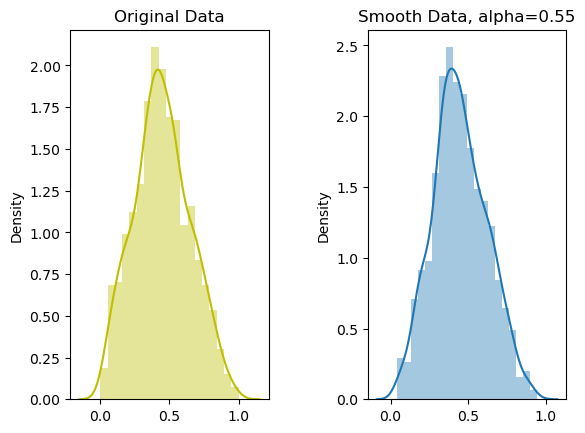

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 2)

sns.distplot(dataScale, ax=axs[0], color='y')
axs[0].set_title("Original Data")

sns.distplot(S, ax=axs[1])
axs[1].set_title("Smooth Data" + ", alpha=" + "{:.2f}".format(alpha % 1))


fig.subplots_adjust(wspace=0.5) 

plt.show()


In [22]:
y_pred_SCNN_Lucas = model_SCNN_Lucas.predict(X_test_SCNN_Lucas)
y_pred_SCNN_Lucas = np.reshape(y_pred_SCNN_Lucas, (-1, 1))
mse_SCNN_Lucas = mean_squared_error(y_test_SCNN_Lucas, y_pred_SCNN_Lucas)
rmse_SCNN_Lucas = np.sqrt(mse_SCNN_Lucas)
mape_SCNN_Lucas = mean_absolute_percentage_error(y_test_SCNN_Lucas, y_pred_SCNN_Lucas)
mae_SCNN_Lucas = mean_absolute_error(y_test_SCNN_Lucas, y_pred_SCNN_Lucas)

print('MSE: ', mse_SCNN_Lucas)
print('RMSE: ', rmse_SCNN_Lucas)
print('MAPE: ', mape_SCNN_Lucas)
print('MAE: ', mae_SCNN_Lucas)
print('Time: ', time_SCNN_Lucas)

6/6 [==============================] - 0s 1ms/step
MSE:  0.002275165443898496
RMSE:  0.047698694362618525
MAPE:  0.09452486216746207
MAE:  0.03808347468501402
Time:  1114.6520795822144


<h2>LSTM</h2>

In [23]:
import h5py
from keras.models import load_model
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

# Load model từ file H5
model_LSTM = load_model('Daily_LSTM_82.h5')

# Đọc file H5
with h5py.File('Daily_LSTM_82_data.h5', 'r') as f:
    # Lấy giá trị y_test
    y_test_LSTM = f['y_test'][:]
    
    # Lấy giá trị X_test
    X_test_LSTM = f['X_test'][:]
    
    # Lấy giá trị training_time
    time_LSTM = f['training_time'][()]


In [24]:
model_LSTM.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 7, 50)             10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [25]:
y_pred_LSTM = model_LSTM.predict(X_test_LSTM)
y_pred_LSTM = np.reshape(y_pred_LSTM, (-1, 1))
mse_LSTM = mean_squared_error(y_test_LSTM, y_pred_LSTM)
rmse_LSTM = np.sqrt(mse_LSTM)
mape_LSTM = mean_absolute_percentage_error(y_test_LSTM, y_pred_LSTM)
mae_LSTM = mean_absolute_error(y_test_LSTM, y_pred_LSTM)

print('MSE: ', mse_LSTM)
print('RMSE: ', rmse_LSTM)
print('MAPE: ', mape_LSTM)
print('MAE: ', mae_LSTM)
print('Time: ', time_LSTM)

6/6 [==============================] - 1s 2ms/step
MSE:  0.004275875438042778
RMSE:  0.06539017845244635
MAPE:  0.13454458617559742
MAE:  0.05079457782440375
Time:  1979.3979060649872


<h2>Tổng kết </h2>

In [26]:
from tabulate import tabulate

table = [["MoHinh", "MSE", "RMSE", "MAPE","MAE", "TIME"]]
name = ["CNN-Lucas", "S-CNN-Lucas", "LSTM"]

VALUE_MSE = [mse_CNN_Lucas, mse_SCNN_Lucas, mse_LSTM]
VALUE_RMSE = [rmse_CNN_Lucas, rmse_SCNN_Lucas, rmse_LSTM]
VALUE_MAPE = [mape_CNN_Lucas, mape_SCNN_Lucas, mape_LSTM]
VALUE_MAE = [mae_CNN_Lucas, mae_SCNN_Lucas, mae_LSTM]
VALUE_TIME = [time_CNN_Lucas, time_SCNN_Lucas, time_LSTM]


for mohinh, mse, rmse, mape,mae, time in zip(name, VALUE_MSE, VALUE_RMSE, VALUE_MAPE,VALUE_MAE, VALUE_TIME):
    table.append([mohinh, round(mse, 5), round(rmse, 5), round(mape, 5),round(mae, 5), round(time, 3)])



In [27]:
title_table = "<h3 style='text-align: center; color: green;'>Bảng tổng kết MSE, RMSE, MAPE , TIME của S-CNN, S-CNN-LUCAS, LSTM</h3>"

display(HTML(title_table))

print(tabulate(table, headers="firstrow", tablefmt="fancy_grid"))

╒═════════════╤═════════╤═════════╤═════════╤═════════╤═════════╕
│ MoHinh      │     MSE │    RMSE │    MAPE │     MAE │    TIME │
╞═════════════╪═════════╪═════════╪═════════╪═════════╪═════════╡
│ CNN-Lucas   │ 0.00416 │ 0.06447 │ 0.13462 │ 0.05026 │ 1522.3  │
├─────────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ S-CNN-Lucas │ 0.00228 │ 0.0477  │ 0.09452 │ 0.03808 │ 1114.65 │
├─────────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ LSTM        │ 0.00428 │ 0.06539 │ 0.13454 │ 0.05079 │ 1979.4  │
╘═════════════╧═════════╧═════════╧═════════╧═════════╧═════════╛


╒═════════════╤═════════╤═════════╤═════════╤═════════╤═════════╕
│ MoHinh      │     MSE │    RMSE │    MAPE │     MAE │    TIME │
╞═════════════╪═════════╪═════════╪═════════╪═════════╪═════════╡
│ CNN-Lucas   │ 0.00416 │ 0.06447 │ 0.13462 │ 0.05026 │ 1522.3  │
├─────────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ S-CNN-Lucas │ 0.00228 │ 0.0477  │ 0.09452 │ 0.03808 │ 1114.65 │
├─────────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ LSTM        │ 0.00428 │ 0.06539 │ 0.13454 │ 0.05079 │ 1979.4  │
╘═════════════╧═════════╧═════════╧═════════╧═════════╧═════════╛


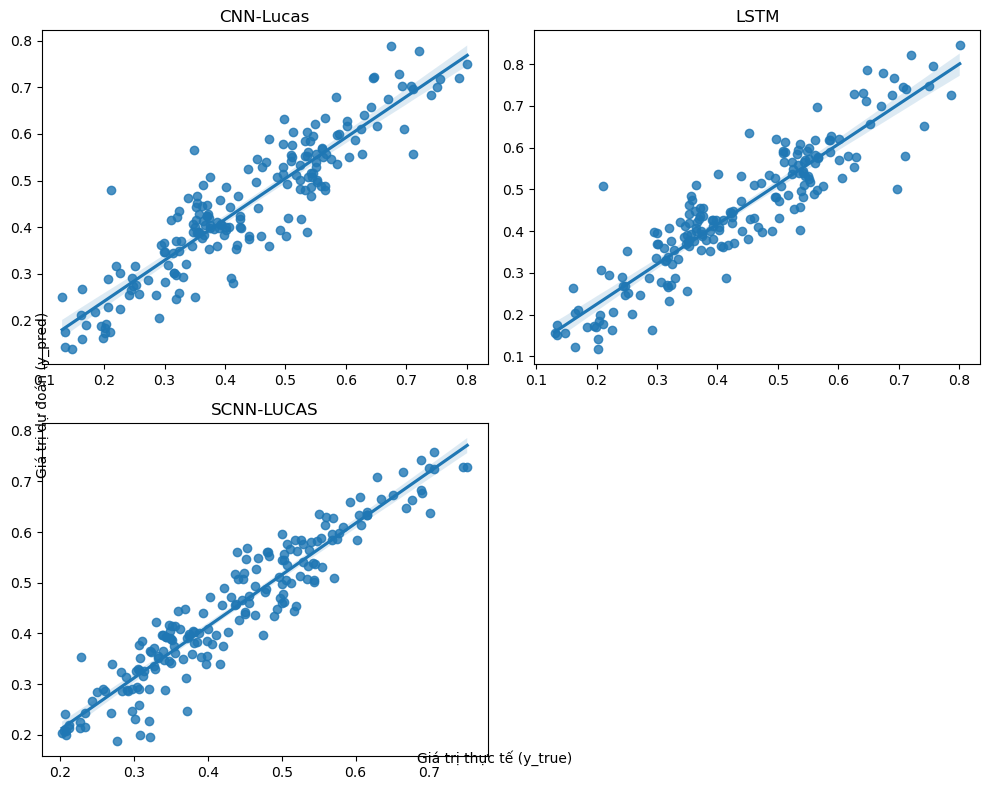

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tạo một khung lưới 2x2 để chứa các đồ thị
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Thiết lập các đồ thị trong khung lưới
sns.regplot(x=y_test_CNN_Lucas, y=y_pred_CNN_Lucas, ax=axs[0, 0])
axs[0, 0].set_title('CNN-Lucas')

sns.regplot(x=y_test_LSTM, y=y_pred_LSTM, ax=axs[0, 1])
axs[0, 1].set_title('LSTM')

sns.regplot(x=y_test_SCNN_Lucas, y=y_pred_SCNN_Lucas, ax=axs[1, 0])
axs[1, 0].set_title('SCNN-LUCAS')

# Xoá trục không sử dụng
fig.delaxes(axs[1, 1])

# Đặt nhãn cho trục x và y chung
fig.text(0.5, 0.04, 'Giá trị thực tế (y_true)', ha='center')
fig.text(0.04, 0.5, 'Giá trị dự đoán (y_pred)', va='center', rotation='vertical')


title_html = "<h1 style='text-align: center; color: green;'>TỔNG KẾT</h1>"
title_table = "<h4 style='color: bLue;'>Bảng tổng kết MSE, RMSE, MAPE , TIME của CNN-Lucas, S-CNN-LUCAS, LSTM</h4>"
title_chart = "<h4 style='color: bLue;'>Biểu đồ so sánh giá trị dự đoán và giá trị thực của các mô hình</h4>"

display(HTML(title_html))

display(HTML(title_table))

print(tabulate(table, headers="firstrow", tablefmt="fancy_grid"))


display(HTML(title_chart))
# Hiển thị biểu đồ
plt.tight_layout()
plt.show()
